# Observables and Measurements
# SIMULATE THE FIRST QUANTUM SYSTEM DESCRIBED IN SECTION 4.1.
1. Calculate the probability of finding it in a particular position.


In [1]:
import numpy as np

class QuantumSystem:
    def __init__(self, num_positions, ket_state):
        self.num_positions = num_positions
        self.ket_state = ket_state

    def calculate_probability(self, position):
        if position < 0 or position >= self.num_positions:
            raise ValueError("Position out of range")
        amplitude = self.ket_state[position]
        norm = np.linalg.norm(self.ket_state)
        probability = (abs(amplitude) / norm) ** 2
        return probability

# Example
num_positions = 4
ket_state = [-3-1j, -2j, +1j, 2]
system = QuantumSystem(num_positions, ket_state)
desired_position = 2
probability = system.calculate_probability(desired_position)
print(f"The probability of finding the particle at position {desired_position} is: {probability}")


The probability of finding the particle at position 2 is: 0.05263157894736841


2. Find the probability of transitioning from the first vector to the second.

In [2]:
import numpy as np

def probability_transition(ket1, ket2):
    inner_product = np.dot(ket1, ket2)  # Compute the inner product
    probability = np.abs(inner_product) ** 2  # Compute the squared modulus
    return probability

# Example usage
ket1 = np.array([-1j, 1])  # First example ket
ket2 = np.array([1, -1j])  # Second example ket

probability = probability_transition(ket1, ket2)
print(f"The probability of transitioning from the first ket {ket1} to the second {ket2} is:", probability)


The probability of transitioning from the first ket [-0.-1.j  1.+0.j] to the second [ 1.+0.j -0.-1.j] is: 4.0


Receive two vectors and calculate the probability of transitioning from one to the other after performing a measurement.

In [3]:
import numpy as np

def probability_transition(initial_state, final_state):
    inner_product = np.vdot(final_state, initial_state)
    probability = abs(inner_product) ** 2
    return probability

# Example usage    
initial_state = np.array([1/np.sqrt(2), 0, 1/np.sqrt(2)])
final_state = np.array([0, 1/np.sqrt(2), 1/np.sqrt(2)]) 

probability = probability_transition(initial_state, final_state)
print("The probability of transitioning from the initial state to the final state is:", probability)


The probability of transitioning from the initial state to the final state is: 0.2499999999999999


Given a matrix representing an observable and a ket vector, the system checks if the matrix is Hermitian, and if so, calculates the mean and variance of the observable in the given state.

In [4]:
import numpy as np

def is_hermitian(matrix):
    return np.allclose(matrix, matrix.conj().T)

def mean_variance_observable(observable_matrix, ket_vector):
    if not is_hermitian(observable_matrix):
        print("The matrix is not Hermitian.")
        return None, None

    mean = np.dot(ket_vector.conj().T, np.dot(observable_matrix, ket_vector)).real
    variance = np.dot(ket_vector.conj().T, np.dot(observable_matrix ** 2, ket_vector)).real - mean ** 2

    return mean, variance

# Example usage
observable_matrix = np.array([[1, 0], [0, -1]])  
ket_vector = np.array([[1], [0]])                

mean, variance = mean_variance_observable(observable_matrix, ket_vector)

if mean is not None and variance is not None:
    print("Mean of the observable:", mean)
    print("Variance of the observable:", variance)


Mean of the observable: [[1]]
Variance of the observable: [[0]]


The system calculates the eigenvalues of the observable and the probability that the system transitions to one of the eigenvectors after the measurement.

Eigenvalues: [ 0.70710678 -0.70710678]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
The probability of transitioning to eigenvector 1 is: 0.5
The probability of transitioning to eigenvector 2 is: 0.5


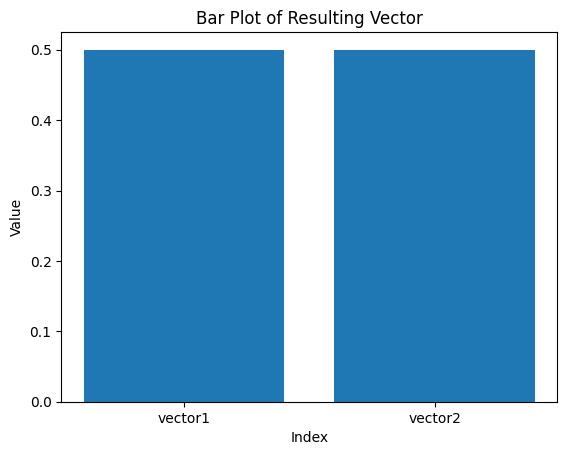

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(vector):
    norm = np.linalg.norm(vector)
    return vector / norm

def eigen(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    print("Eigenvalues:", eigenvalues)
    print("Eigenvectors:\n", eigenvectors)
    return eigenvectors

# Exercise 4.3.1
observable = (1/np.sqrt(2)) * np.array([[0, 1], [1, 0]])
ket = np.array([1, 0])
ket_normal = normalize(ket)
eigenvectors = eigen(observable)

p1 = np.round(np.linalg.norm(np.vdot(ket_normal, eigenvectors[0]))**2, 2)
p2 = np.round(np.linalg.norm(np.vdot(ket_normal, eigenvectors[1]))**2, 2)

print("The probability of transitioning to eigenvector 1 is:", p1)
print("The probability of transitioning to eigenvector 2 is:", p2)

# Exercise 4.3.2
prob_final = [p1, p2]
indices = ["vector1", "vector2"]

plt.bar(indices, prob_final)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Plot of Resulting Vector')
plt.show()


In [6]:
import numpy as np

# Define the Sx matrix
Sx = (1/np.sqrt(2)) * np.array([[0, 1], [1, 0]])

# Find the eigenvalues and eigenvectors of Sx
eigenvalues, eigenvectors = np.linalg.eig(Sx)

print("Eigenvalues of Sx:")
print(eigenvalues)

print("\nEigenvectors of Sx:")
print(eigenvectors)

# Define the initial state |psi>
psi_initial = np.array([1, 0])  # For example, spin-up initial state

# Calculate the transition probabilities to each eigenvector
transition_probabilities = []
for eigenvector in eigenvectors.T:
    transition_probability = np.abs(np.vdot(eigenvector, psi_initial))**2
    transition_probabilities.append(transition_probability)

# Print the transition probabilities
print("\nTransition probabilities to each eigenvector:")
for i, probability in enumerate(transition_probabilities):
    print(f"Transition probability to eigenvector {i+1}: {probability}")


Eigenvalues of Sx:
[ 0.70710678 -0.70710678]

Eigenvectors of Sx:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Transition probabilities to each eigenvector:
Transition probability to eigenvector 1: 0.4999999999999999
Transition probability to eigenvector 2: 0.4999999999999999


Given a series of matrices \(U_n\), the system calculates the final state from an initial state.

In [7]:
import numpy as np

matrices = []

def add_matrix(new_matrix, matrices):
    matrices.append(new_matrix)
    return matrices

# Example
matrices = add_matrix(np.array([[1, 0], [0, 1]]), matrices)
matrices = add_matrix(np.array([[0, -1j], [1j, 0]]), matrices)
matrices = add_matrix(np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]]), matrices)

def calculate_final_state(matrices):
    psi_final = np.array([1, 0])
    for matrix in matrices:
        psi_final = np.dot(matrix, psi_final)
    return psi_final

print("Final state:")
print(calculate_final_state(matrices))


Final state:
[0.+0.70710678j 0.-0.70710678j]


In [8]:
# Exercise 4.4.1
import numpy as np

U1 = np.array([[0, 1], [1, 0]])
is_unitary = np.allclose(np.dot(U1, U1.conj().T), np.eye(2))
print("The matrix U1 is unitary:", is_unitary)

U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])
is_unitary = np.allclose(np.dot(U2, U2.conj().T), np.eye(2))
print("The matrix U2 is unitary:", is_unitary)

The matrix U1 is unitary: True
The matrix U2 is unitary: True


In [9]:
# Exercise 4.4.2
import numpy as np
import matplotlib.pyplot as plt

# Define two 4x4 complex matrices
ma1 = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
                [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
                [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
                [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]])

ma2 = np.array([[1], [0], [0], [0]])
# print("Input: ", ma1, ma2)

# Multiplying a 4x4 matrix by a 4x1 vector
x2 = np.dot(ma1, ma2)
x3 = np.dot(ma1, x2)
x4 = np.dot(ma1, x3)
print("Result after 3 steps:", x4)

print("The probability of finding the particle at position 3 is:", abs(x4[2]))


Result after 3 steps: [[ 0.        +0.j        ]
 [-0.70710678+0.70710678j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
The probability of finding the particle at position 3 is: [0.]
